In [1]:
from statsforecast import StatsForecast
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\fs\__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)  # type: ignore
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
itc_df = pd.read_csv("ITC_2024.csv")
itc_test = pd.read_csv("ITC_Test.csv")

In [3]:
itc_df

,date,series,open,high,low,prev._close,ltp,close,vwap,52w_h,52w_l,volume,value,no_of_trades
0,2000-04-03,EQ,739.90,800.80,721.05,741.45,792.75,797.00,772.76,1140.8,580.00,1720025,1.329165e+09,NaN
1,2000-04-04,EQ,785.00,785.00,733.25,797.00,733.25,733.25,744.37,1140.8,580.00,581309,4.327067e+08,NaN
2,2000-04-05,EQ,680.00,740.00,675.05,733.25,696.10,698.75,700.53,1140.8,580.00,706269,4.947637e+08,NaN
3,2000-04-06,EQ,705.00,711.00,646.10,698.75,685.00,682.80,676.06,1140.8,580.00,431386,2.916423e+08,NaN
4,2000-04-07,EQ,682.00,733.90,682.00,682.80,730.00,730.95,722.23,1140.8,580.00,1087357,7.853181e+08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976,2024-03-21,EQ,419.00,422.00,416.20,415.70,421.25,421.25,419.96,499.7,372.00,19227982,8.074987e+09,265798.0
5977,2024-03-22,EQ,421.25,429.65,421.25,421.25,428.30,428.60,427.27,499.7,372.00,38861818,1.660465e+10,285729.0
5978,2024-03-26,EQ,425.55,429.20,425.55,428.60,428.00,427.65,427.57,499.7,376.35,10274145,4.392964e+09,127865.0
5979,2024-03-27,EQ,427.00,428.90,426.45,427.65,428.40,428.00,427.94,499.7,376.35,12227545,5.232703e+09,148670.0


In [4]:
# -------------------------------------
# Creating test train validation set 
# -------------------------------------
filter_date = '2022-03-28'

itc_filtered = itc_df[itc_df['date']>=filter_date]

In [5]:
itc_filtered

,date,series,open,high,low,prev._close,ltp,close,vwap,52w_h,52w_l,volume,value,no_of_trades
5482,2022-03-28,EQ,254.00,258.00,252.55,253.35,256.20,257.05,255.73,265.3,199.10,24916402,6.371890e+09,156533.0
5483,2022-03-29,EQ,257.05,257.50,253.75,257.05,254.30,254.60,255.06,265.3,199.10,18122714,4.622454e+09,114137.0
5484,2022-03-30,EQ,255.10,256.40,248.65,254.60,249.05,249.20,251.58,265.3,199.10,17603827,4.428750e+09,125981.0
5485,2022-03-31,EQ,249.60,254.35,249.50,249.20,250.70,250.65,251.19,265.3,199.10,25656796,6.444678e+09,131890.0
5486,2022-04-01,EQ,250.00,255.35,248.80,250.65,255.05,253.30,251.32,265.3,199.10,14305709,3.595279e+09,114531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976,2024-03-21,EQ,419.00,422.00,416.20,415.70,421.25,421.25,419.96,499.7,372.00,19227982,8.074987e+09,265798.0
5977,2024-03-22,EQ,421.25,429.65,421.25,421.25,428.30,428.60,427.27,499.7,372.00,38861818,1.660465e+10,285729.0
5978,2024-03-26,EQ,425.55,429.20,425.55,428.60,428.00,427.65,427.57,499.7,376.35,10274145,4.392964e+09,127865.0
5979,2024-03-27,EQ,427.00,428.90,426.45,427.65,428.40,428.00,427.94,499.7,376.35,12227545,5.232703e+09,148670.0


In [6]:
train_val_date_split = '2024-03-01'

itc_train = itc_filtered[itc_filtered['date']<train_val_date_split]
itc_train

itc_train['date'] = pd.to_datetime(itc_train['date'])


C:\Users\user\AppData\Local\Temp\ipykernel_5008\117226567.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itc_train['date'] = pd.to_datetime(itc_train['date'])


In [7]:
itc_val = itc_filtered[itc_filtered['date']>=train_val_date_split]
itc_val['date'] = pd.to_datetime(itc_val['date'])
itc_val

C:\Users\user\AppData\Local\Temp\ipykernel_5008\2576704961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itc_val['date'] = pd.to_datetime(itc_val['date'])


,date,series,open,high,low,prev._close,ltp,close,vwap,52w_h,52w_l,volume,value,no_of_trades
5962,2024-03-01,EQ,408.90,413.15,407.50,406.30,410.10,409.50,410.66,499.7,369.65,12395632,5.090435e+09,198418.0
5963,2024-03-02,EQ,411.00,412.80,410.10,409.50,412.00,412.05,411.74,499.7,369.65,977655,4.025440e+08,18531.0
5964,2024-03-04,EQ,412.25,412.95,408.45,412.05,409.30,409.10,410.01,499.7,369.65,6840352,2.804588e+09,128186.0
5965,2024-03-05,EQ,409.65,411.40,403.95,409.10,406.50,406.15,407.09,499.7,369.65,9733507,3.962461e+09,187977.0
5966,2024-03-06,EQ,406.50,409.95,400.70,406.15,407.95,407.85,405.02,499.7,369.65,11106855,4.498499e+09,238724.0
5967,2024-03-07,EQ,407.85,414.95,403.65,407.85,414.70,413.55,409.07,499.7,369.65,23020545,9.416941e+09,266079.0
5968,2024-03-11,EQ,416.80,418.30,408.00,413.55,409.20,409.40,413.66,499.7,369.65,17620081,7.288644e+09,220154.0
5969,2024-03-12,EQ,406.50,406.50,399.35,409.40,401.90,404.45,402.12,499.7,369.65,34882639,1.402717e+10,441602.0
5970,2024-03-13,EQ,435.00,438.00,421.15,404.45,422.00,422.45,427.85,499.7,369.65,101612428,4.347518e+10,693592.0
5971,2024-03-14,EQ,421.95,425.50,418.00,422.45,419.00,419.65,421.67,499.7,369.65,30764728,1.297265e+10,292934.0


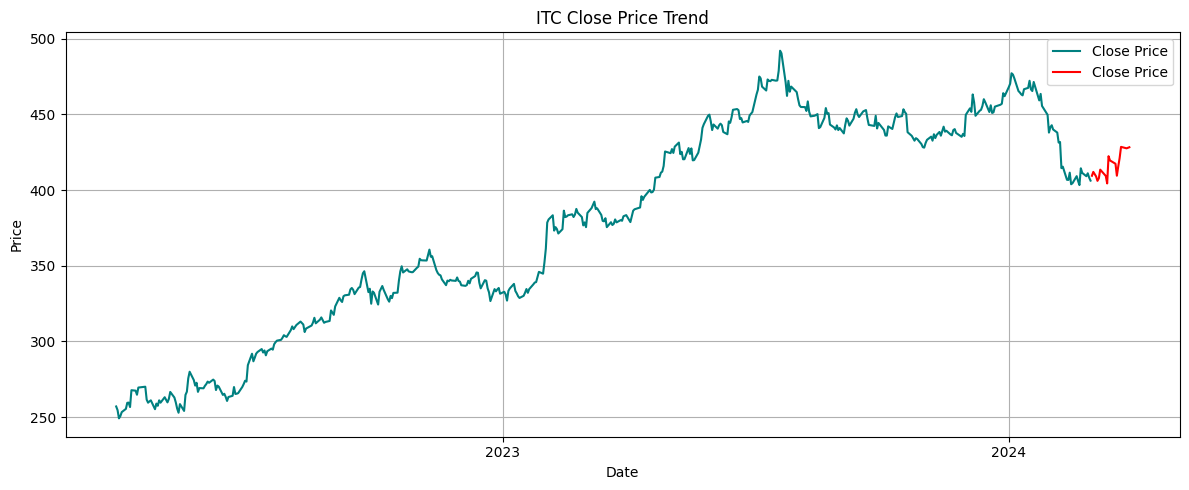

In [8]:
import matplotlib.dates as mdates


# Plot
plt.figure(figsize=(12, 5))
plt.plot(itc_train['date'], itc_train['close'], label=f'{'close'.title()} Price', color='teal')
plt.plot(itc_val['date'],itc_val['close'],label=f'{'close'.title()} Price', color='red')

# Format x-axis to show years only
plt.gca().xaxis.set_major_locator(mdates.YearLocator())           # Tick every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title(f'ITC {'close'.title()} Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()